# optimization



\begin{align}
x^* = \underset{x}{\mathrm{arg\,min}} f(x)
\end{align}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return 3*x**2 + 6*x + 1

def f_1(x):
    return 6*x + 6

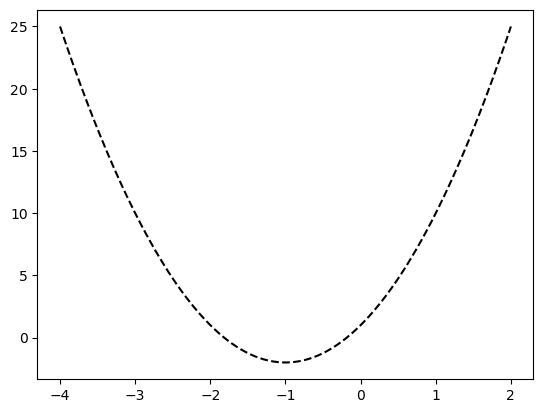

In [7]:
xs = np.linspace(-4, 2, 200)
plt.plot(xs, f(xs), 'k--')

start: x_0=-3, g_0=-12
x_1: x_1=-1.7999999999999998, g_1=-4.799999999999999
x_2: x_2=-1.3199999999999998, g_2=-1.919999999999999


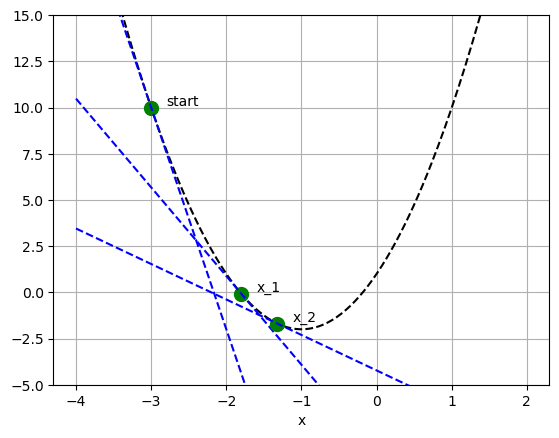

In [12]:
plt.plot(xs, f(xs), 'k--')

step_size = 0.1

x = -3
plt.plot(x, f(x), 'go', markersize=10)
plt.text(x + 0.2, f(x) + 0.1, 'start')
plt.plot(xs, f_1(x)*(xs - x) + f(x), 'b--')
print('start: x_0={}, g_0={}'.format(x, f_1(x)))

x = x - step_size * f_1(x)
plt.plot(x, f(x), 'go', markersize=10)
plt.text(x + 0.2, f(x) + 0.1, 'x_1')
plt.plot(xs, f_1(x)*(xs - x) + f(x), 'b--')
print('x_1: x_1={}, g_1={}'.format(x, f_1(x)))

x = x - step_size * f_1(x)
plt.plot(x, f(x), 'go', markersize=10)
plt.text(x + 0.2, f(x) + 0.1, 'x_2')
plt.plot(xs, f_1(x)*(xs - x) + f(x), 'b--')
print('x_2: x_2={}, g_2={}'.format(x, f_1(x)))

plt.ylim(-5, 15)
plt.xlabel('x')
plt.grid(True)


# linear regression

- mean square error

\begin{align}
\underset{w,b}{\mathrm{arg\,min}} J(w,b) = \frac{1}{m} \sum_{t=1}^m \left( h_\theta(x_i) - y_i \right)^2
\end{align}

In [37]:
lr = 0.01
n_iter = 100

In [38]:
x_train = np.array([1,2,3])
y_train = np.array([2,4,6])
x_train = x_train.reshape((-1, 1))
y_train = y_train.reshape((-1, 1))

In [58]:
x_train_b = np.c_[np.ones_like(x_train), x_train].astype(float)
theta = np.random.randn(2, 1)

In [40]:
print(x_train_b)
print(theta)

[[1. 1.]
 [1. 2.]
 [1. 3.]]
[[-1.20845122]
 [-1.34018086]]


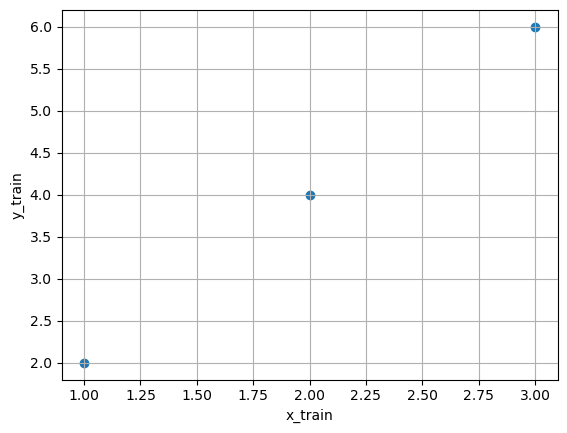

In [41]:
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.grid(True)

In [57]:
def cal_cost(theta, x, y):
    m = len(y)
    pred = x @ theta
    cost = 1 / (2*m) * np.sum(np.square(pred - y))
    return cost

In [56]:
def gradient_descent(x, y, theta, lr=0.01, n_iter=100):
    m = len(y)
    cost_history = np.zeros(n_iter)
    theta_history = np.zeros((n_iter, 2))
    for iter in range(n_iter):
        pred = x @ theta
        theta = theta - (1/m) * lr * x.T @ (pred - y)
        cost_history[iter] = cal_cost(theta, x, y)
        theta_history[iter, :] = theta.T
    return theta, cost_history, theta_history

In [59]:
theta, cost_history, theta_history =\
    gradient_descent(x_train_b, y_train, theta, lr, n_iter)

print('b:{}'.format(theta[0, 0]))
print('w:{}'.format(theta[1, 0]))

b:0.3883845734348894
w:1.819156798333954


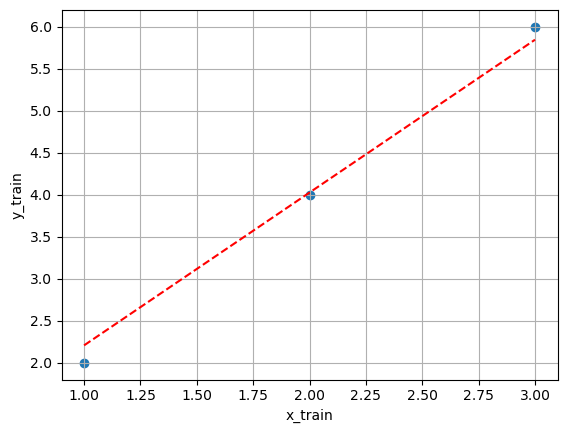

In [60]:
plt.scatter(x_train, y_train)
plt.plot(x_train, theta[1, 0] * x_train + theta[0, 0], 'r--')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.grid(True)

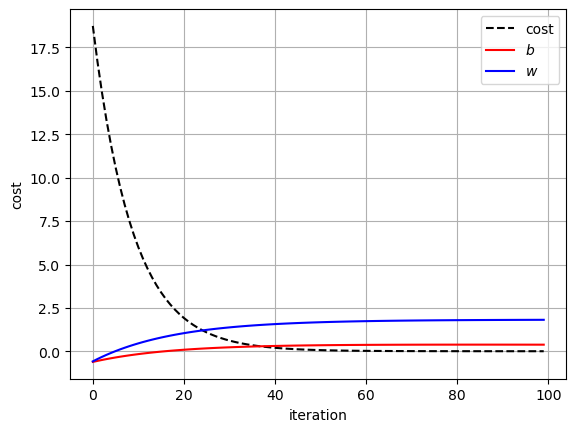

In [61]:
plt.plot(cost_history, 'k--', label='cost')
plt.plot(theta_history[:, 0], 'r-', label='$b$')
plt.plot(theta_history[:, 1], 'b-', label='$w$')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('cost')
plt.grid(True)